# Manipulating DataFrames with Pandas

## Summary: 

* Transform, extract, and filter data from DataFrames
* Work with pandas indexes and hierarchical indexes
* Reshape and restructure your data: 

                 ** pivot (reshape data (produce a “pivot” table) based on column values),
                 ** melt (“Unpivots” a DataFrame from wide format to long format), 
                 ** stack (pivot a level of the (possibly hierarchical) column labels), 
                 ** unstack (Pivot a level of the (necessarily hierarchical) index labels)
                 
* Split your data into groups and categories

### Pandas Series vs Lists

pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects, the primary pandas data structure. So Series is the datastructure for a single column of a DataFrame, not only conceptually, but literally i.e. the data in a DataFrame is actually stored in memory as a collection of Series.

Analogously: We need both lists and matrices, because matrices are built with lists. Single row matricies, while equivalent to lists in functionality still cannot exists without the list(s) they're composed of.

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from numpy import NaN

<IPython.core.display.Javascript object>

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

### Indexing and column rearrangement

In [3]:
# Read in filename and set the index: election
election = pd.read_csv("data/election.csv", index_col="county")

# Create a separate dataframe with the columns ['winner', 'total', 'voters']: results
results = pd.DataFrame(election, columns=["winner", "total", "voters"])

# Print the output of results.head()
print(results.head())

           winner   total  voters
county                           
Adams      Romney   41973   61156
Allegheny   Obama  614671  924351
Armstrong  Romney   28322   42147
Beaver     Romney   80015  115157
Bedford    Romney   21444   32189


<IPython.core.display.Javascript object>

In [4]:
# Assign the row position of election.loc['Bedford']: x
x = 4

# Assign the column position of election['winner']: y
y = 4

# Print the boolean equivalence
print(election.iloc[x, y] == election.loc["Bedford", "winner"])

True


<IPython.core.display.Javascript object>

### Slicing cols 

In [5]:
# Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:, :"Obama"]

# Print the output of left_columns.head()
print(left_columns.head())

# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = election.loc[:, "Obama":"winner"]

# Print the output of middle_columns.head()
print(middle_columns.head())

# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = election.loc[:, "Romney":]

# Print the output of right_columns.head()
print(right_columns.head())

          state   total      Obama
county                            
Adams        PA   41973  35.482334
Allegheny    PA  614671  56.640219
Armstrong    PA   28322  30.696985
Beaver       PA   80015  46.032619
Bedford      PA   21444  22.057452
               Obama     Romney  winner
county                                 
Adams      35.482334  63.112001  Romney
Allegheny  56.640219  42.185820   Obama
Armstrong  30.696985  67.901278  Romney
Beaver     46.032619  52.637630  Romney
Bedford    22.057452  76.986570  Romney
              Romney  winner  voters    turnout     margin
county                                                    
Adams      63.112001  Romney   61156  68.632677  27.629667
Allegheny  42.185820   Obama  924351  66.497575  14.454399
Armstrong  67.901278  Romney   42147  67.198140  37.204293
Beaver     52.637630  Romney  115157  69.483401   6.605012
Bedford    76.986570  Romney   32189  66.619031  54.929118


<IPython.core.display.Javascript object>

### Thresholding data

In [45]:
# Create the boolean array: high_turnout
high_turnout = election.turnout > 70

# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election[high_turnout]

# Print the high_turnout_results DataFrame
high_turnout_df

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284
Butler,PA,88924,31.920516,66.816607,Romney,122762,72.436096,34.896091
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079
Forest,PA,2308,38.734835,59.835355,Romney,3232,71.410891,21.100520
Franklin,PA,62802,30.110506,68.583803,Romney,87406,71.850903,38.473297
Montgomery,PA,401787,56.637223,42.286834,Obama,551105,72.905708,14.350390
Westmoreland,PA,168709,37.567646,61.306154,Romney,238006,70.884347,23.738508


<IPython.core.display.Javascript object>

In [48]:
# Create the boolean array: too_close
too_close = election.margin < 1

# Assign np.nan to the 'winner' column where the results were too close to call
election.winner[too_close] = NaN

# Print the output of election.info()
election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    67 non-null     object 
 1   total    67 non-null     int64  
 2   Obama    67 non-null     float64
 3   Romney   67 non-null     float64
 4   winner   64 non-null     object 
 5   voters   67 non-null     int64  
 6   turnout  67 non-null     float64
 7   margin   67 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.8+ KB


C:\Users\jkv\AppData\Local\Temp\ipykernel_19860\161411565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election.winner[too_close] = NaN


<IPython.core.display.Javascript object>

### Filtering using NaNs

In [49]:
titanic = pd.read_csv("data/titanic.csv")
titanic.columns = titanic.columns.str.lower()

<IPython.core.display.Javascript object>

In [8]:
# Select the 'age' and 'cabin' columns: df
df = titanic[["age", "cabin"]]

# Print the shape of df
print(df.shape)

# Drop rows in df with how='any' and print the shape
print(df.dropna(how="any").shape)

# Drop rows in df with how='all' and print the shape
print(df.dropna(how="all").shape)

# Call .dropna() with thresh=1000 and axis='columns' and print the output of .info() from titanic
print(titanic.dropna(thresh=1000, axis="columns").info())

(891, 2)
(185, 2)
(733, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Empty DataFrameNone


<IPython.core.display.Javascript object>

### Pivoting a single variable

In [51]:
users = pd.read_csv("data/users.csv")
users.columns = users.columns.str.lower()

<IPython.core.display.Javascript object>

In [52]:
# Pivot the users DataFrame: visitors_pivot
visitors_pivot = users.pivot(index="weekday", columns="city", values="visitors")

# Print the pivoted DataFrame
print(visitors_pivot)

city     Austin  Dallas
weekday                
Mon         326     456
Sun         139     237


<IPython.core.display.Javascript object>

Using .map() with a dictionary
The *.map()* method is used to transform values according to a Python dictionary look-up. In this exercise you'll practice this method while returning to working with the *election* DataFrame, which has been pre-loaded for you.

Your job is to use a dictionary to map the values *'Obama'* and *'Romney'* in the *'winner'* column to the values *'blue'* and *'red', and assign the output to the new column 'color'*.

*Instructions*

Create a dictionary with the key:value pairs *'Obama':'blue'* and *'Romney':'red'*.
Use the *.map()* method on the *'winner'* column using the *red_vs_blue* dictionary you created.
Print the output of *election.head()*. This has been done for you, so hit 'Submit Answer' to see the new column!

In [57]:
# Create the dictionary: red_vs_blue
red_vs_blue = {"Obama": "blue", "Romney": "red"}

# Use the dictionary to map the 'winner' column to the new column: election['color']
election["color"] = election.winner.map(red_vs_blue)

# Print the output of election.head()
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin,color
county,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red


<IPython.core.display.Javascript object>

In [58]:
# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(election.turnout)

# Print the type of turnout_zscore
print("Type: \n", type(turnout_zscore), "\n")

# Assign turnout_zscore to a new column: election['turnout_zscore']
election["turnout_zscore"] = turnout_zscore

# Print the output of election.head()
election.head()

Type: 
 <class 'pandas.core.series.Series'> 



,state,total,Obama,Romney,winner,voters,turnout,margin,color,turnout_zscore
county,,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red,0.853734
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue,0.439846
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red,0.575650
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red,1.018647
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red,0.463391


<IPython.core.display.Javascript object>

## Advanced Indexing
Having learned the fundamentals of working with DataFrames, you will now move on to more advanced indexing techniques. You will learn about MultiIndexes, or hierarchical indexes, and learn how to interact with and extract data from them.

### Index objects and labeled data
#### pandas Data Structures
- Key building blocks
  - Indexes: Sequence of lables
  - Series: 1D array with index
  - DataFrames: 2D array with Series as columns
- Indexes
   - Immutable (Like dictionary keys)
   - Homogenous in data type (Like NumPy arrays)

In [59]:
prices = [10.70, 10.86, 10.74, 10.71, 10.79]
shares = pd.Series(prices)
shares

0    10.70
1    10.86
2    10.74
3    10.71
4    10.79
dtype: float64

<IPython.core.display.Javascript object>

In [60]:
days = ["Mon", "Tue", "Wed", "Thur", "Fri"]
shares = pd.Series(prices, index=days)
shares

Mon     10.70
Tue     10.86
Wed     10.74
Thur    10.71
Fri     10.79
dtype: float64

<IPython.core.display.Javascript object>

In [61]:
print(shares.index)
print(shares.index[2])
print(shares.index[:2])
print(shares.index[-2:])
print(shares.index.name)

Index(['Mon', 'Tue', 'Wed', 'Thur', 'Fri'], dtype='object')
Wed
Index(['Mon', 'Tue'], dtype='object')
Index(['Thur', 'Fri'], dtype='object')
None


<IPython.core.display.Javascript object>

In [62]:
shares.index.name = "weekday"
shares

weekday
Mon     10.70
Tue     10.86
Wed     10.74
Thur    10.71
Fri     10.79
dtype: float64

<IPython.core.display.Javascript object>

In [63]:
try:
    shares.index[2] = "Wednesday"
except TypeError:
    print("TypeError: Index does not support mutable operations")

TypeError: Index does not support mutable operations


<IPython.core.display.Javascript object>

In [64]:
try:
    shares.index[:4] = ["Monday", "Tuesday", "Wednesday", "Thursday"]
except TypeError:
    print("TypeError: Index does not support mutable operations")

TypeError: Index does not support mutable operations


<IPython.core.display.Javascript object>

In [65]:
shares.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
shares

Monday       10.70
Tuesday      10.86
Wednesday    10.74
Thursday     10.71
Friday       10.79
dtype: float64

<IPython.core.display.Javascript object>

### Pivoting all variables

In [66]:
# Pivot users with signups indexed by weekday and city: signups_pivot
signups_pivot = users.pivot(index="weekday", columns="city", values="signups")

# Print signups_pivot
print(signups_pivot)

# Pivot users pivoted by both signups and visitors: pivot
pivot = users.pivot(index="weekday", columns="city")

# Print the pivoted DataFrame
print(pivot)


city     Austin  Dallas
weekday                
Mon           3       5
Sun           7      12
        unnamed: 0        visitors        signups       
city        Austin Dallas   Austin Dallas  Austin Dallas
weekday                                                 
Mon              2      3      326    456       3      5
Sun              0      1      139    237       7     12


<IPython.core.display.Javascript object>

In [67]:
users.set_index(['weekday', 'city'], inplace=True)  # set multi-level index
stacked = users.stack()  # stack the DataFrame


<IPython.core.display.Javascript object>

### Stacking & unstacking I

In [13]:
unstacked = stacked.unstack(level='weekday')  # unstack by 'weekday'


<IPython.core.display.Javascript object>

### Stacking & unstacking II

In [14]:
# Unstack users by 'city': bycity
bycity = users.unstack(level="city")

# Print the bycity DataFrame
print(bycity)

# Stack bycity by 'city' and print it
print(bycity.stack(level="city"))

        unnamed: 0        visitors        signups       
city        Austin Dallas   Austin Dallas  Austin Dallas
weekday                                                 
Mon              2      3      326    456       3      5
Sun              0      1      139    237       7     12
                unnamed: 0  visitors  signups
weekday city                                 
Mon     Austin           2       326        3
        Dallas           3       456        5
Sun     Austin           0       139        7
        Dallas           1       237       12


<IPython.core.display.Javascript object>

### Restoring the index order

In [68]:
# Stack 'city' back into the index of bycity: newusers
newusers = bycity.stack(level="city")

# Swap the levels of the index of newusers: newusers
newusers = newusers.swaplevel(0, 1)

# Print newusers and verify that the index is not sorted
print(newusers)

# Sort the index of newusers: newusers
newusers = newusers.sort_index()

# Print newusers and verify that the index is now sorted
print(newusers)

# Verify that the new DataFrame is equal to the original
print(newusers.equals(users))

                unnamed: 0  visitors  signups
city   weekday                               
Austin Mon               2       326        3
Dallas Mon               3       456        5
Austin Sun               0       139        7
Dallas Sun               1       237       12
                unnamed: 0  visitors  signups
city   weekday                               
Austin Mon               2       326        3
       Sun               0       139        7
Dallas Mon               3       456        5
       Sun               1       237       12
False


<IPython.core.display.Javascript object>

### Setting up a pivot table

In [69]:
# Create the DataFrame with the appropriate pivot table: by_city_day
by_city_day = users.pivot_table(index="weekday", columns="city")

# Print by_city_day
print(by_city_day)

        signups        unnamed: 0        visitors       
city     Austin Dallas     Austin Dallas   Austin Dallas
weekday                                                 
Mon           3      5          2      3      326    456
Sun           7     12          0      1      139    237


<IPython.core.display.Javascript object>

### Using other aggregations in pivot tables

In [70]:
# Use a pivot table to display the count of each column: count_by_weekday1
count_by_weekday1 = users.pivot_table(index="weekday", aggfunc="count")

# Print count_by_weekday
print(count_by_weekday1)

# Replace 'aggfunc='count'' with 'aggfunc=len': count_by_weekday2
count_by_weekday2 = users.pivot_table(index="weekday", aggfunc="count")

# Verify that the same result is obtained

print(count_by_weekday1.equals(count_by_weekday2))

         signups  unnamed: 0  visitors
weekday                               
Mon            2           2         2
Sun            2           2         2
True


<IPython.core.display.Javascript object>

### Using margins in pivot tables

In [71]:
# Create the DataFrame with the appropriate pivot table: signups_and_visitors
signups_and_visitors = users.pivot_table(index="weekday", aggfunc=sum)

# Print signups_and_visitors
print(signups_and_visitors)

# Add in the margins: signups_and_visitors_total
signups_and_visitors_total = users.pivot_table(
    index="weekday", aggfunc=sum, margins=True
)

# Print signups_and_visitors_total
print(signups_and_visitors_total)

         signups  unnamed: 0  visitors
weekday                               
Mon            8           5       782
Sun           19           1       376
         signups  unnamed: 0  visitors
weekday                               
Mon            8           5       782
Sun           19           1       376
All           27           6      1158


<IPython.core.display.Javascript object>

### Grouping by multiple columns

In [19]:
# Group titanic by 'pclass'
by_class = titanic.groupby("pclass")

# Aggregate 'survived' column of by_class by count
count_by_class = by_class["survived"].count()

# Print count_by_class
print(count_by_class)

# Group titanic by 'embarked' and 'pclass'
by_mult = titanic.groupby(["embarked", "pclass"])

# Aggregate 'survived' column of by_mult by count
count_mult = by_mult["survived"].count()

# Print count_mult
print(count_mult)

pclass
1    216
2    184
3    491
Name: survived, dtype: int64
embarked  pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: survived, dtype: int64


<IPython.core.display.Javascript object>

### Grouping by another series

In [76]:
# Read life_fname into a DataFrame: life
life = pd.read_csv(
    "https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/life_expectancy.csv"
    , index_col = "Country")

# Read regions_fname into a DataFrame: regions
regions = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/regions.csv', 
                      index_col='Country')

# Group life by regions['region']: life_by_region
life_by_region = life.groupby(regions['region'])

# Print the mean over the '2010' column of life_by_region
#print(life_by_region.mean())

life_by_region.head()


,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.63900,34.1520,34.6620,35.17000,35.6740,36.1720,36.6630,37.14300,37.61400,38.0750,...,56.583,57.071,57.582,58.102,58.618,59.124,59.612,60.079,60.524,60.947
Albania,65.47500,65.8630,66.1220,66.31600,66.5000,66.7020,66.9480,67.25100,67.59500,67.9660,...,75.725,75.949,76.124,76.278,76.433,76.598,76.780,76.979,77.185,77.392
Algeria,47.95300,48.3890,48.8060,49.20500,49.5920,49.9760,50.3660,50.76700,51.19500,51.6700,...,69.682,69.854,70.020,70.180,70.332,70.477,70.615,70.747,70.874,71.000
Angola,34.60400,35.0070,35.4100,35.81600,36.2220,36.6270,37.0320,37.43900,37.84600,38.2470,...,48.036,48.572,49.041,49.471,49.882,50.286,50.689,51.094,51.498,51.899
Antigua and Barbuda,63.77500,64.1490,64.5110,64.86500,65.2130,65.5580,65.8980,66.23200,66.55800,66.8750,...,74.355,74.544,74.729,74.910,75.087,75.263,75.437,75.610,75.783,75.954
Argentina,65.38800,65.4810,65.6030,65.75900,65.9530,66.1840,66.4490,66.74000,67.04400,67.3490,...,74.645,74.843,75.036,75.225,75.410,75.592,75.772,75.950,76.128,76.305
Armenia,67.71400,68.1510,68.5870,69.01500,69.4250,69.8080,70.1430,70.41100,70.60400,70.7220,...,73.192,73.491,73.730,73.920,74.070,74.191,74.291,74.381,74.469,74.561
Aruba,67.11300,67.4350,67.7620,68.09500,68.4360,68.7840,69.1400,69.49800,69.85100,70.1920,...,74.175,74.316,74.467,74.621,74.772,74.919,75.059,75.193,75.324,75.455
Australia,70.65000,70.9800,70.8200,71.10000,70.7300,71.1400,70.8100,71.41000,71.93000,72.1400,...,81.040,81.440,81.630,81.670,81.567,81.937,82.091,82.231,82.364,82.496


<IPython.core.display.Javascript object>

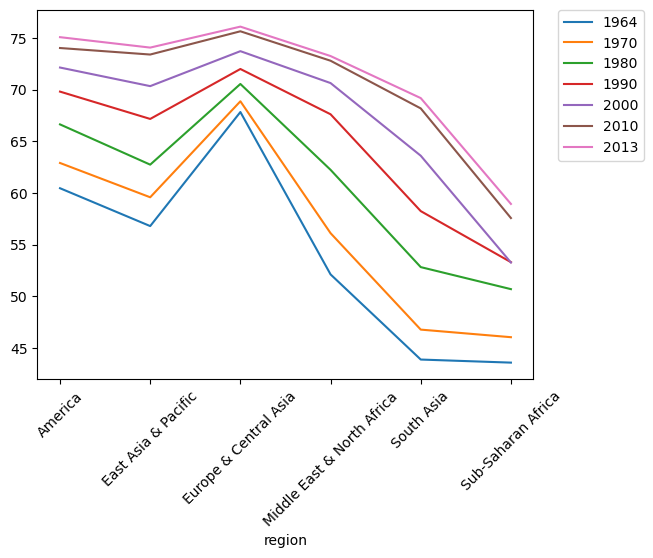

<IPython.core.display.Javascript object>

In [77]:
life_by_region[["1964", "1970", "1980", "1990", "2000", "2010", "2013"]].mean().plot(
    rot=45
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

### Computing multiple aggregates of multiple columns

In [79]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby("pclass")

# Select 'age' and 'fare'
by_class_sub = by_class[["age", "fare"]]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(["max", "median"])
print(aggregated)

# Print the maximum age in each class
print("\nMaximum Age:\n", aggregated.loc[:, ("age", "max")])

# Print the median fare in each class
print("\nMedian Fare:\n", aggregated.loc[:, ("fare", "median")])

         age             fare         
         max median       max   median
pclass                                
1       80.0   37.0  512.3292  60.2875
2       70.0   29.0   73.5000  14.2500
3       74.0   24.0   69.5500   8.0500

Maximum Age:
 pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64

Median Fare:
 pclass
1    60.2875
2    14.2500
3     8.0500
Name: (fare, median), dtype: float64


<IPython.core.display.Javascript object>

### Aggregating on index levels/fields

In [22]:

# Read the CSV file into a DataFrame and sort the index: gapminder
gapminder = pd.read_csv('data/gapminder_tidy.csv', index_col=['Year','region','Country'], )

# Group gapminder by 'Year' and 'region': by_year_region
by_year_region = gapminder.groupby(level=(0,1))

# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()

# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}

# Aggregate by_year_region using the dictionary: aggregated
aggregated = by_year_region.agg(aggregator)

# Print the last 6 entries of aggregated 
print(aggregated.tail(6))


                                   population  child_mortality       gdp
Year region                                                             
2013 America                     9.629087e+08        17.745833   49634.0
     East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0


<IPython.core.display.Javascript object>

In [81]:
import numpy as np

sales_values = np.array(
    [
        ["2015-02-02 08:30:00", "Hooli", "Software", 3],
        ["2015-02-02 21:00:00", "Mediacore", "Hardware", 9],
        ["2015-02-03 14:00:00", "Initech", "Software", 13],
        ["2015-02-04 15:30:00", "Streeplex", "Software", 13],
        ["2015-02-04 22:00:00", "Acme Coporation", "Hardware", 14],
        ["2015-02-05 02:00:00", "Acme Coporation", "Software", 19],
        ["2015-02-05 22:00:00", "Hooli", "Service", 10],
        ["2015-02-07 23:00:00", "Acme Coporation", "Hardware", 1],
        ["2015-02-09 09:00:00", "Streeplex", "Service", 19],
        ["2015-02-09 13:00:00", "Mediacore", "Software", 7],
        ["2015-02-11 20:00:00", "Initech", "Software", 7],
        ["2015-02-11 23:00:00", "Hooli", "Software", 4],
        ["2015-02-16 12:00:00", "Hooli", "Software", 10],
        ["2015-02-19 11:00:00", "Mediacore", "Hardware", 16],
        ["2015-02-19 16:00:00", "Mediacore", "Service", 10],
        ["2015-02-21 05:00:00", "Mediacore", "Software", 3],
        ["2015-02-21 20:30:00", "Hooli", "Hardware", 3],
        ["2015-02-25 00:30:00", "Initech", "Service", 10],
        ["2015-02-26 09:00:00", "Streeplex", "Service", 4],
    ]
)
sales_cols = ["Date", "Company", "Product", "Units"]

<IPython.core.display.Javascript object>

In [82]:
sales = pd.DataFrame(sales_values, columns=sales_cols)
sales["Date"] = pd.to_datetime(sales["Date"])
sales.set_index("Date", inplace=True)
sales["Units"] = sales["Units"].astype("int64")
sales.head()

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14


<IPython.core.display.Javascript object>

In [83]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 2015-02-02 08:30:00 to 2015-02-26 09:00:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  19 non-null     object
 1   Product  19 non-null     object
 2   Units    19 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


<IPython.core.display.Javascript object>

In [84]:
# Create a groupby object: by_day
by_day = sales.groupby(sales.index.strftime("%a"))

# Create sum: units_sum
units_sum = by_day["Units"].sum()
units_sum

Date
Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64

<IPython.core.display.Javascript object>

### Detecting outliers with Z-Scores


In [23]:
# Create the gapminder_2010 dataframe from the original gapminder dataframe
gapminder_2010 = gapminder.xs(2010, level="Year")

<IPython.core.display.Javascript object>

In [85]:
# Group gapminder_2010: standardized
standardized = gapminder_2010.groupby("region")["life", "fertility"].transform(zscore)

# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized["life"] < -3) | (standardized["fertility"] > 3)

# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder_2010.loc[outliers]

# Now you can print or use gm_outliers for further analysis
print(gm_outliers)

                                   fertility    life  population  \
region                Country                                      
America               Guatemala        3.974  71.100  14388929.0   
                      Haiti            3.350  45.000   9993247.0   
Europe & Central Asia Tajikistan       3.780  66.830   6878637.0   
East Asia & Pacific   Timor-Leste      6.237  65.952   1124355.0   

                                   child_mortality     gdp  
region                Country                               
America               Guatemala               34.5  6849.0  
                      Haiti                  208.8  1518.0  
Europe & Central Asia Tajikistan              52.6  2110.0  
East Asia & Pacific   Timor-Leste             63.8  1777.0  


C:\Users\jkv\AppData\Local\Temp\ipykernel_19860\1847699924.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  standardized = gapminder_2010.groupby("region")["life", "fertility"].transform(zscore)


<IPython.core.display.Javascript object>

### Filling missing data (imputation) by group

In [86]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(["sex", "pclass"])

# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())


# Impute age and assign to titanic['age']
titanic.age = by_sex_class["age"].transform(impute_median)

# Print the output of titanic.tail(10)
print(titanic.tail(10))

     passengerid  survived  pclass                                      name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        sex   age  sibsp  parch            ticket     fare cabin embarked  
881    male  33.0      0      0            

<IPython.core.display.Javascript object>

### Other transformations with .apply()

In [87]:
def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr["gdp"].max() - gr["gdp"].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr["gdp"] - gr["gdp"].mean()) / gr["gdp"].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({"z(gdp)": z, "regional spread(gdp)": s})


# Group gapminder_2010 by 'region': regional
regional = gapminder_2010.groupby("region")

# Apply the disparity function on regional: reg_disp
reg_disp = regional.apply(disparity)
reg_disp

z(gdp)  regional spread(gdp)
region                     Country                                            
South Asia                 Afghanistan         -1.011602               10037.0
Europe & Central Asia      Albania             -0.986190               89037.0
Middle East & North Africa Algeria             -0.550537              125319.0
Sub-Saharan Africa         Angola               0.398221               33817.0
America                    Antigua and Barbuda  0.431274               47855.0
...                                                  ...                   ...
Middle East & North Africa West Bank and Gaza  -0.816251              125319.0
                           Western Sahara            NaN              125319.0
                           Yemen, Rep.               NaN              125319.0
Sub-Saharan Africa         Zambia              -0.167488               33817.0
                           Zimbabwe            -0.476930               33817.0

[202 rows x 2 columns]

<IPython.core.display.Javascript object>

In [27]:
# Print the disparity of 'United States', 'United Kingdom', and 'China'
print(reg_disp.loc[(slice(None), ["United States", "United Kingdom", "China"]), :])

                                        z(gdp)  regional spread(gdp)
region                Country                                       
America               United States   3.013374               47855.0
Europe & Central Asia United Kingdom  0.572873               89037.0
East Asia & Pacific   China          -0.432756               96993.0


<IPython.core.display.Javascript object>

### Grouping and filtering with .apply()

In [28]:
def c_deck_survival(gr):

    c_passengers = gr["cabin"].str.startswith("C").fillna(False)

    return gr.loc[c_passengers, "survived"].mean()


# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby("sex")

# Call by_sex.apply with the function c_deck_survival and print the result
c_surv_by_sex = by_sex.apply(c_deck_survival)

# Print the survival rates
print(c_surv_by_sex)

sex
female    0.888889
male      0.343750
dtype: float64


<IPython.core.display.Javascript object>

### Filtering and grouping with .filter()

In [88]:
sales = pd.DataFrame(sales_values, columns=sales_cols)
sales["Date"] = pd.to_datetime(sales["Date"])
sales.set_index("Date", inplace=True)
sales["Units"] = sales["Units"].astype("int64")
sales.head()

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14


<IPython.core.display.Javascript object>

In [89]:
# Group sales by 'Company': by_company
by_company = sales.groupby("Company")

# Compute the sum of the 'Units' of by_company: by_com_sum
by_com_sum = by_company["Units"].sum()
by_com_sum

Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64

<IPython.core.display.Javascript object>

In [90]:
# Filter 'Units' where the sum is > 35: by_com_filt
by_com_filt = by_company.filter(lambda g: g["Units"].sum() > 35)
by_com_filt

,Company,Product,Units
Date,,,
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-09 09:00:00,Streeplex,Service,19
2015-02-09 13:00:00,Mediacore,Software,7
2015-02-19 11:00:00,Mediacore,Hardware,16
2015-02-19 16:00:00,Mediacore,Service,10
2015-02-21 05:00:00,Mediacore,Software,3
2015-02-26 09:00:00,Streeplex,Service,4


<IPython.core.display.Javascript object>

### Filtering and grouping with .map()

In [91]:
titanic.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<IPython.core.display.Javascript object>

In [92]:
# Create the Boolean Series: under10
under10 = pd.Series(titanic["age"] < 10).map({True: "under 10", False: "over 10"})

# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)["survived"].mean()
print(survived_mean_1)

# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10, "pclass"])["survived"].mean()
print(survived_mean_2)

age
over 10     0.366707
under 10    0.612903
Name: survived, dtype: float64
age       pclass
over 10   1         0.629108
          2         0.419162
          3         0.222717
under 10  1         0.666667
          2         1.000000
          3         0.452381
Name: survived, dtype: float64


<IPython.core.display.Javascript object>

### Bringing it all together

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data#data"

# Send a GET request
response = requests.get(url)
# Create a BeautifulSoup object and specify the parser
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table in the HTML
table = soup.find_all('table') 

# Convert the table to a DataFrame
df = pd.read_html(str(table))[0]

print(df.head())


                Athlete        Country Bronze Silver Gold Grand Total
0      LATYNINA, Larisa   Soviet Union      4      5    9          18
1       PHELPS, Michael  United States      2    NaN   14          16
2    ANDRIANOV, Nikolay   Soviet Union      3      5    7          15
3  MANGIAROTTI, Edoardo          Italy      2      5    6          13
4          ONO, Takashi          Japan      4      4    5          13


<IPython.core.display.Javascript object>

#### Getting it from the csv file instead then...

In [94]:
# Total count of medals awarded to USA group by year
medals = pd.read_csv("data/medals.csv")
USA_edition_grouped = medals.loc[medals.NOC == "USA"].groupby("Year").count()

<IPython.core.display.Javascript object>

In [95]:
# Select the 'NOC' column of medals: country_names
country_names = medals["NOC"]

# Count the number of medals won by each country: medal_counts
medal_counts = pd.Series(country_names.value_counts())

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
CAN     9733
JPN     8444
SWE     8339
AUS     7638
HUN     6607
POL     6207
SUI     6150
NED     5839
URS     5685
FIN     5467
Name: NOC, dtype: int64


<IPython.core.display.Javascript object>

In [33]:
# Construct the pivot table: counted
counted = medals.pivot_table(index="NOC", columns="Medal", values="Name", aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values(['totals'], ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))


Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1358.0  2638.0  1641.0  5637.0
URS     689.0  1082.0   732.0  2503.0
GER     746.0   745.0   674.0  2165.0
GBR     651.0   678.0   739.0  2068.0
FRA     666.0   501.0   610.0  1777.0
ITA     531.0   575.0   531.0  1637.0
SWE     535.0   479.0   522.0  1536.0
CAN     451.0   463.0   438.0  1352.0
AUS     517.0   348.0   455.0  1320.0
RUS     408.0   390.0   367.0  1165.0
HUN     371.0   432.0   332.0  1135.0
NED     413.0   287.0   340.0  1040.0
NOR     294.0   378.0   361.0  1033.0
GDR     281.0   397.0   327.0  1005.0
CHN     292.0   350.0   347.0   989.0


<IPython.core.display.Javascript object>

In [97]:
medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<IPython.core.display.Javascript object>

In [98]:
# Construct the pivot table: counted
counted = medals.pivot_table(
    index="NOC", columns="Medal", values="Name", aggfunc="count"
)
counted.head()

Medal,Bronze,Gold,Silver
NOC,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,4.0
ANZ,5.0,20.0,4.0
ARG,91.0,91.0,92.0


<IPython.core.display.Javascript object>

In [99]:
# Create the new column: counted['totals']
counted["totals"] = counted.sum(axis="columns")
counted.head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
AFG,2.0,NaN,NaN,2.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,5.0,4.0,17.0
ANZ,5.0,20.0,4.0,29.0
ARG,91.0,91.0,92.0,274.0


<IPython.core.display.Javascript object>

In [100]:
# Sort counted by the 'totals' column
counted = counted.sort_values("totals", ascending=False)
counted.head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1358.0,2638.0,1641.0,5637.0
URS,689.0,1082.0,732.0,2503.0
GER,746.0,745.0,674.0,2165.0
GBR,651.0,678.0,739.0,2068.0
FRA,666.0,501.0,610.0,1777.0


<IPython.core.display.Javascript object>

In [101]:
# Select columns: ev_gen
ev_gen = medals["Sex"]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

0    M
4    F
Name: Sex, dtype: object


<IPython.core.display.Javascript object>

In [102]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby("Sex")

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)


         ID    Name     Age  Height  Weight    Team     NOC   Games    Year  \
Sex                                                                           
F     74522   74522   74098   67378   66771   74522   74522   74522   74522   
M    196594  196594  187544  143567  141470  196594  196594  196594  196594   

     Season    City   Sport   Event  Medal  
Sex                                         
F     74522   74522   74522   74522  11253  
M    196594  196594  196594  196594  28530  


<IPython.core.display.Javascript object>

In [36]:
# Create the Boolean Series: sus
sus = (medals.Sex == "W") & (medals.Sex == "M")

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
print(suspect)

Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal]
Index: []


<IPython.core.display.Javascript object>

In [37]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby("NOC")

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped["Sport"].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
GBR    59
USA    58
FRA    57
CAN    53
GER    53
JPN    52
ITA    52
AUS    51
SUI    50
RUS    48
CHN    47
SWE    47
ESP    47
AUT    46
KOR    45
Name: Sport, dtype: int64


<IPython.core.display.Javascript object>

In [38]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals.Year >= 1952) & (medals.Year<= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)


NOC
URS    37
USA    37
Name: Sport, dtype: int64


<IPython.core.display.Javascript object>

In [39]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(
    index="Year", columns="NOC", values="Name", aggfunc="count"
)

# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ["USA", "URS"]]

# Create most_medals
most_medals = cold_war_usa_usr_medals.idxmax(axis="columns")

# Print most_medals.value_counts()
print(most_medals.value_counts())

USA    9
URS    1
dtype: int64


<IPython.core.display.Javascript object>

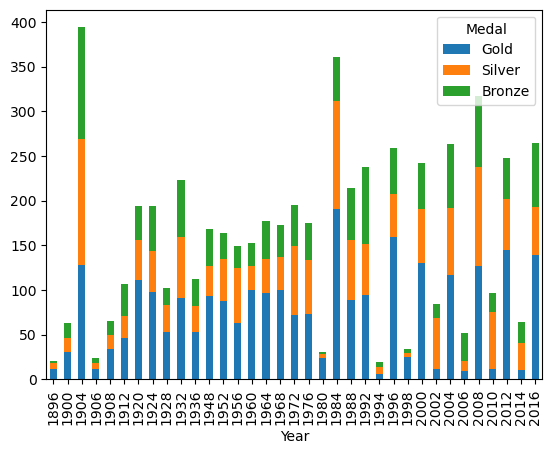

<IPython.core.display.Javascript object>

In [40]:
# Create the DataFrame: usa
usa = medals.loc[medals.NOC == "USA"]

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(["Year", "Medal"])["Name"].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level="Medal")

# Reorder the columns so they appear in the plot in the desired order
usa_medals_by_year = usa_medals_by_year[["Gold", "Silver", "Bronze"]]

# Then plot
usa_medals_by_year.plot(kind='bar', stacked=True)
plt.show()


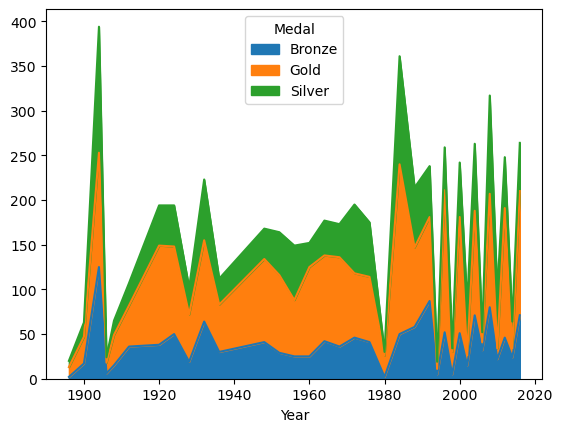

<IPython.core.display.Javascript object>

In [41]:
# Create the DataFrame: usa
usa = medals[medals.NOC == "USA"]

# Group usa by 'Year', 'Medal', and 'Name'
usa_medals_by_year = usa.groupby(["Year", "Medal"])["Name"].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level="Medal")

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

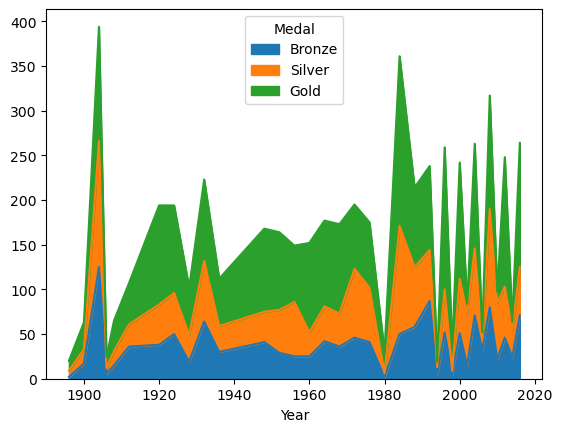

<IPython.core.display.Javascript object>

In [42]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(
    values=medals.Medal, categories=["Bronze", "Silver", "Gold"], ordered=True
)

# Create the DataFrame: usa
usa = medals[medals.NOC == "USA"]

# Group usa by 'Year', 'Medal', and 'Name'
usa_medals_by_year = usa.groupby(["Year", "Medal"])["Name"].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level="Medal")

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

In [43]:
# Create separate DataFrames for each medal type
gold = medals[medals["Medal"] == "Gold"]
silver = medals[medals["Medal"] == "Silver"]
bronze = medals[medals["Medal"] == "Bronze"]

# Write each DataFrame to a separate CSV file
gold.to_csv("Gold.csv", index=False)
silver.to_csv("Silver.csv", index=False)
bronze.to_csv("Bronze.csv", index=False)

<IPython.core.display.Javascript object>